In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('../datasets/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

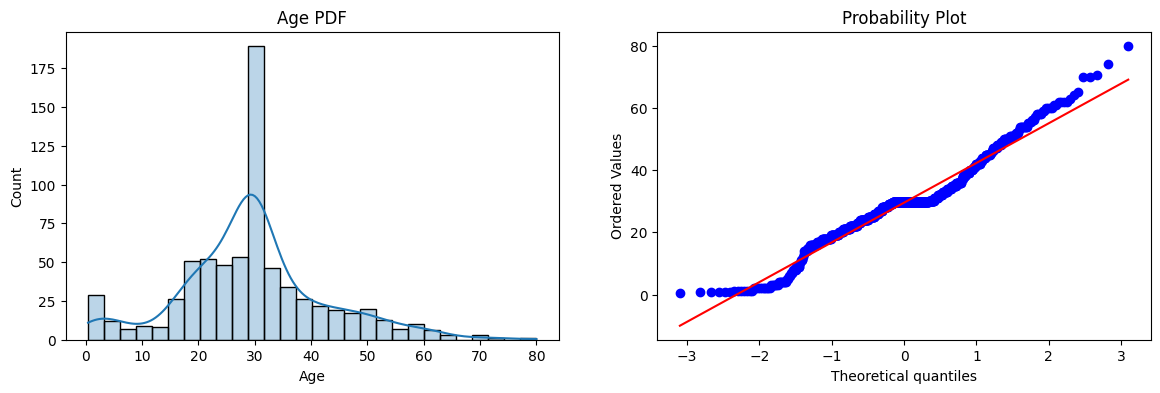

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

ax1.set_title("Age PDF")
sns.histplot(X_train['Age'],ax=ax1,kde=True,alpha=0.3)

ax2.set_title("Age QQ Plot")
stats.probplot(X_train['Age'],dist="norm",plot=plt)


plt.show()

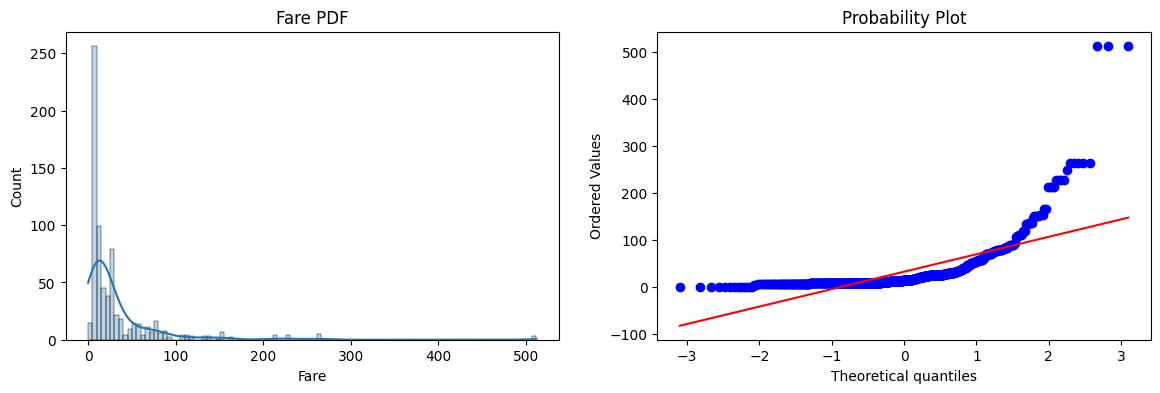

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

ax1.set_title("Fare PDF")
sns.histplot(X_train['Fare'],ax=ax1,kde=True,alpha=0.3)

ax2.set_title("Fare QQ Plot")
stats.probplot(X_train['Fare'],dist="norm",plot=plt)


plt.show()

### Fare is clearly right skewed 

In [10]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)


print("Accuracy LR ", accuracy_score(Y_test,y_pred_1))
print("Accuracy DT ", accuracy_score(Y_test,y_pred_2))

Accuracy LR  0.6480446927374302
Accuracy DT  0.6871508379888268


### Now lets use Some transformers ans see the results
1. We are going to use Log transformer as the data is right skewed

In [12]:
trf = FunctionTransformer(func=np.log1p)

In [13]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [14]:
clf1.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred_1 = clf1.predict(X_test_transformed)
y_pred_2 = clf2.predict(X_test_transformed)


print("Accuracy LR ", accuracy_score(Y_test,y_pred_1))
print("Accuracy DT ", accuracy_score(Y_test,y_pred_2))

Accuracy LR  0.6815642458100558
Accuracy DT  0.6815642458100558


### Just to be Sure , lets use Cross Val score

In [15]:
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()


print("Accuracy LR ", np.mean(cross_val_score(clf1,X_transformed,Y,scoring='accuracy',cv=10)))
print("Accuracy LR ", np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))

Accuracy LR  0.678027465667915
Accuracy LR  0.6588639200998752


### Lets Visualize the Change

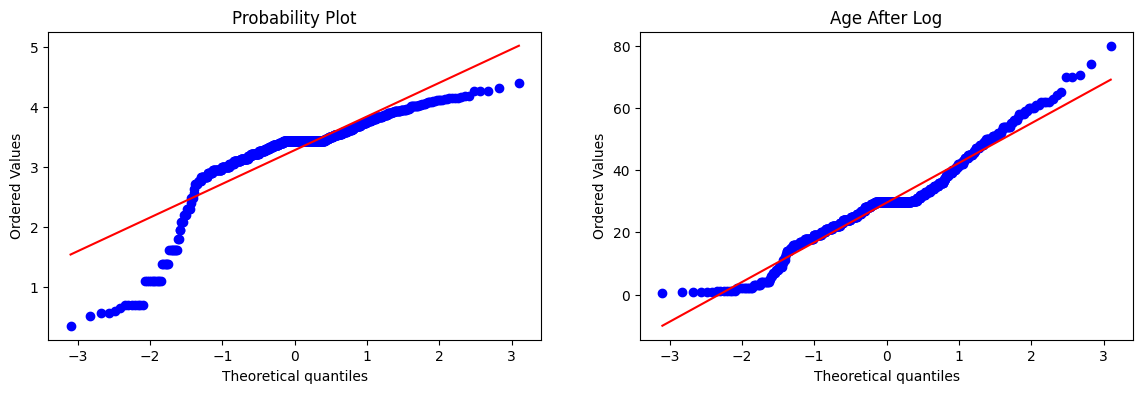

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

ax1.set_title("Age Before Log")
stats.probplot(X_train['Age'],dist='norm',plot=ax2)

ax2.set_title("Age After Log")
stats.probplot(X_train_transformed['Age'],dist="norm",plot=ax1)


plt.show()

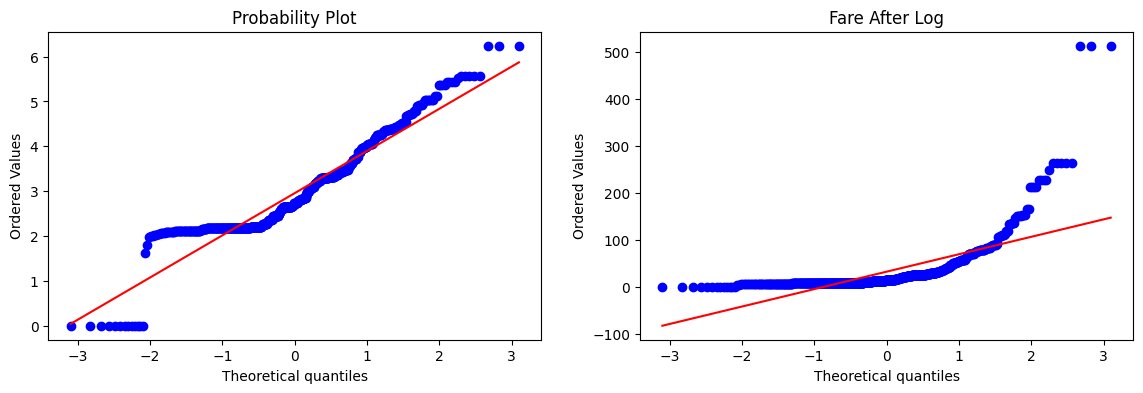

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

ax1.set_title("Fare Before Log")
stats.probplot(X_train['Fare'],dist='norm',plot=ax2)

ax2.set_title("Fare After Log")
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=ax1)


plt.show()